# 多项式计算


多项式函数是变量的整数次幂与系数的乘积之和

$$ f(x)=a_nx^n+a_{n-1}x^{n-1}+...+a_2x^2+a_1x+a_0 $$

在numpy中可以用一个一维数组表示x各项的系数

numpy提供了`polynomial`模块专门处理多项式的

## 基本用法

多项式求值

可以用polynomia.polynomia()将系数转化为一元多项式对象,之后就可以像用函数一样用它了,比如下面的函数:

$$ f(x)=1+2x+3x^2 $$

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import numpy as np
from numpy.polynomial import Polynomial as P

In [2]:
v1 = np.array([1,2,3])
p = P(v1)
p

Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

注意,长版本的打印输出有三个部分.

第一个是系数,第二个是域,第三个是窗口:他们分别可以通过访问属性`p.coef`,`p.domain`和`p.window`获得

要求x在某个值时f(x)的值,只要简单的代入就行

In [3]:
p(0)

1.0

In [4]:
p(1)

6.0

多项式是天生的universal function,他的参数可以是一个序列

In [5]:
p(np.array([1,2,3,4]))

array([ 6., 17., 34., 57.])

## 多项式运算

### 初等变换

一个多项式可以通过与一个非字符串的数值序列相加或者乘以一个标量来获得一个新的多项式

In [6]:
p*2 #与标量相乘,多项式系数全部与标量相乘,类似向量与标量乘法 

Polynomial([2., 4., 6.], domain=[-1.,  1.], window=[-1.,  1.])

In [7]:
p+p # 与多项式相加,对应系数相加

Polynomial([2., 4., 6.], domain=[-1.,  1.], window=[-1.,  1.])

In [8]:
p+(2,5) # 与另一个序列相加,相当于把序列作为多项式,对应系数相加

Polynomial([3., 7., 3.], domain=[-1.,  1.], window=[-1.,  1.])

In [9]:
p*p # 与多项式相乘各项一一相乘,然后相同次数的系数相加

Polynomial([ 1.,  4., 10., 12.,  9.], domain=[-1.,  1.], window=[-1.,  1.])

In [10]:
p**2 # 幂,与乘法规则相同

Polynomial([ 1.,  4., 10., 12.,  9.], domain=[-1.,  1.], window=[-1.,  1.])

除法:
    
`//`是多项式类的除法运算符，在这方面，多项式被视为整数.与之对应的是求余%,表示除后余下的项

In [11]:
p//P([-1,1]) #相当于多项式分解

Polynomial([5., 3.], domain=[-1.,  1.], window=[-1.,  1.])

In [12]:
p%P([-1,1])

Polynomial([6.], domain=[-1.,  1.], window=[-1.,  1.])

In [13]:
P([ 5.,  3.])*P([-1,1])+[6]

Polynomial([1., 2., 3.], domain=[-1.,  1.], window=[-1.,  1.])

如果要一次求出,可以使用`divmod`方法

In [14]:
quo, rem = divmod(p, P([-1, 1]))

In [15]:
quo

Polynomial([5., 3.], domain=[-1.,  1.], window=[-1.,  1.])

In [16]:
rem

Polynomial([6.], domain=[-1.,  1.], window=[-1.,  1.])

### 多项式因式分解

多项式的根可以使用`np.roots()`方法获得

其意义是令该多项式等于0,则当变量为这些根时满足该等式

In [17]:
r = p.roots()
r

array([-0.33333333-0.47140452j, -0.33333333+0.47140452j])

In [18]:
p(r)

array([0.-2.77555756e-16j, 0.+2.77555756e-16j])

In [19]:
np.poly(r)

array([1.        , 0.66666667, 0.33333333])

### 多项式拟合

多项式的拟合使用`Chebyshev`模块 的fit(x,y,deg),来做

其中deg为最高次数
我们用1000个在${-\pi\over 2} \sim{\pi \over 2}$间的值拟合sin(x)

In [20]:
from numpy.polynomial import Chebyshev as T

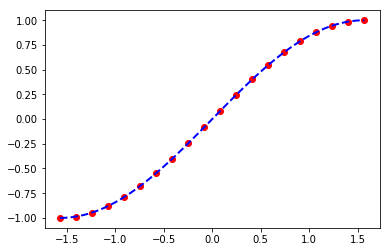

In [24]:
x = np.linspace(-np.pi/2,np.pi/2,20)
y = np.sin(x)
a = T.fit(x,y,5)
xx,yy=a.linspace()
plt.plot(x,y,'o',color="red")
plt.plot(xx,yy,"--",lw=2,color = "blue")
plt.show()

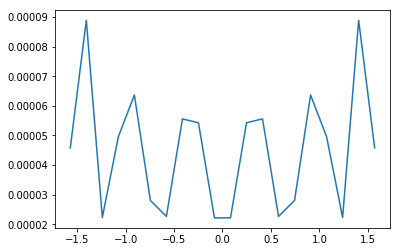

In [25]:
error = np.abs(a(x)-y)#polyval计算多项式的值
plt.plot(x,error)
plt.show()

做3,5,7次多项式的拟合,比较结果误差

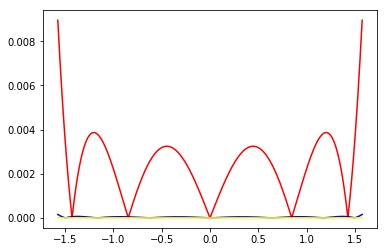

In [26]:
x = np.linspace(-np.pi/2,np.pi/2,1000)
y = np.sin(x)
for i in (3,5,7):
    a = T.fit(x,y,i)
    if i == 3: color = "red"
    elif i == 5: color = "blue"
    else : color = "yellow"
    error = np.abs(a(x)-y)
    plt.plot(x,error,color = color)
plt.show()

## 微积分


用deriv()和integ()可以分别计算多项式的微分和积分

$$ f(x)=3x^2+2x+1 $$

做微分是

$$ f^{'}(x)=6x+2 $$

In [27]:
v1 = np.array([1,2,3])
p = P(v1)
p

Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

In [28]:
p.deriv()

Polynomial([2., 6.], domain=[-1.,  1.], window=[-1.,  1.])

In [29]:
p = P(v1)

$$ f(x)=3x^2+2x+1 $$

做积分是

$$ F(x)=x^3+x^2+x+N $$

N是无法预测的所以置0

In [30]:
p.integ()

Polynomial([0., 1., 1., 1.], domain=[-1.,  1.], window=[-1.,  1.])